# Part 2 - Data handling 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.mode.chained_assignment = None
%matplotlib inline

## דאטה פריים של נתוני השכונות

In [3]:
info = pd.read_csv (r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/info_neighborhoods.csv')
info_neighborhoods = info.copy()

In [5]:
info_neighborhoods = info_neighborhoods.drop(['Unnamed: 0'],axis = 1)

info_neighborhoods.index = ['נאות אשלים', 'נאות שיקמה', 'רמת אליהו', 'נחלת יהודה'] 


In [6]:
name = len(info_neighborhoods['School_grade'])

for i in range(0,name):
    
    temp = info_neighborhoods['School_grade'][i]
    temp = temp[:3]
    num = float(temp)
    info_neighborhoods['School_grade'][i] = num 
    
    temp = info_neighborhoods['Socio_economic'][i]
    temp = temp[:1]
    num = float(temp)
    info_neighborhoods['Socio_economic'][i] = temp

In [7]:
i = 0
for col in info_neighborhoods.columns:
    if i > 1 :
        info_neighborhoods[col] = info_neighborhoods[col].astype(float)
    
    i = i + 1
    
info_neighborhoods['Socio_economic'] = info_neighborhoods['Socio_economic'].astype(float)
info_neighborhoods['School_grade']= info_neighborhoods['School_grade'].astype(float)

In [8]:
i = 0
for col in info_neighborhoods.columns:
    if i > 2 :
        info_neighborhoods[col] = info_neighborhoods[col] * 2
    
    i = i + 1

In [7]:
info_neighborhoods.to_csv(r'/Users/yarinbenbaruch/info_neighborhoods_final.csv', index = False)

## דאטה פריים של פרטי כל שכונה

In [10]:
def fix_data(df):
    
    df = df.drop(['Unnamed: 0'],axis = 1)
    
    df['Day'] = [d.split('.')[0] for d in df.date]
    df['Month'] = [d.split('.')[1] for d in df.date]
    df['Year'] = [d.split('.')[2] for d in df.date]
    
    df = df[~df['squre'].astype(str).str.contains("-")]
    df = df[~df['flor'].astype(str).str.contains("-")]

    df['flor'] = df['flor'].replace('ק', '0')
    df = df.drop(['date'],axis = 1)
    
    return df

In [11]:
def replace_to_folat(df):
        
    i = 0
    for col in df.columns:
        if i > 0 :
            if col != 'num of rooms':
                df[col] = df[col].astype(int)
            else:
                df[col] = df[col].astype(float)
        i = i + 1
    
    df['total price'] = df['squre'] * df['price for meter']
    
    return df

In [12]:
def outlier(df):
    
    sns.boxplot(x = df['total price'])
    
    Q1 = np.percentile(df['total price'] , 25)
    Q3 = np.percentile(df['total price'] , 75)
    IQR = Q3 - Q1
    
    
    df['total price'][(df['total price'] < Q1 - IQR ) | (df['total price'] > Q3 + 2.5*IQR)] = np.nan
    df = df[df['total price'].notna()]
    
    
    return df

In [13]:
def print_scatter_outliers(df):
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.scatter(df['Year'],df['total price'])
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    plt.show()
    

In [14]:
Ashelim = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Ashelim.csv')
Shikme = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Shikme.csv')
Ramat_Eliyahu = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Ramat_Eliyahu.csv')
Nahalat_Yehuda = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Nahalat_Yehuda.csv')

In [15]:
copy_Ashelim = Ashelim.copy()
copy_Shikme = Shikme.copy()
copy_Ramat_Eliyahu = Ramat_Eliyahu.copy()
copy_Nahalat_Yehuda = Nahalat_Yehuda.copy()

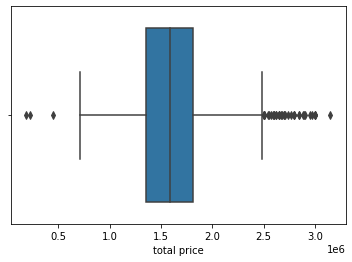

In [16]:
copy_Ashelim = fix_data(copy_Ashelim)
copy_Ashelim = replace_to_folat(copy_Ashelim)
copy_Ashelim = outlier(copy_Ashelim)
copy_Ashelim = copy_Ashelim.drop_duplicates()

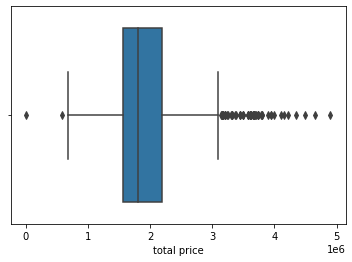

In [17]:
copy_Shikme = fix_data(copy_Shikme)
copy_Shikme = replace_to_folat(copy_Shikme)
copy_Shikme = outlier(copy_Shikme)
copy_Shikme = copy_Shikme.drop_duplicates()

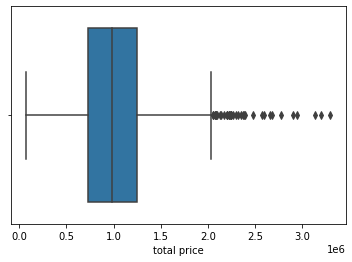

In [18]:
copy_Ramat_Eliyahu = fix_data(copy_Ramat_Eliyahu)
copy_Ramat_Eliyahu = replace_to_folat(copy_Ramat_Eliyahu)
copy_Ramat_Eliyahu = outlier(copy_Ramat_Eliyahu)
copy_Ramat_Eliyahu = copy_Ramat_Eliyahu.drop_duplicates()

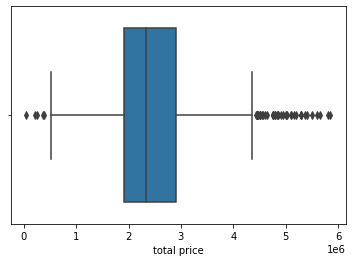

In [19]:
copy_Nahalat_Yehuda = fix_data(copy_Nahalat_Yehuda)
copy_Nahalat_Yehuda = replace_to_folat(copy_Nahalat_Yehuda)
copy_Nahalat_Yehuda = outlier(copy_Nahalat_Yehuda)
copy_Nahalat_Yehuda = copy_Nahalat_Yehuda.drop_duplicates()

In [129]:
#copy_Ashelim = copy_Ashelim.rename(columns={"adrass": "Address","squre":"Square meters","price for meter":"Price for meter",
                                          "num of rooms":"Number of rooms","flor":"Floor","year build":"Year build","total price":"Total price"})



In [772]:
copy_Ashelim.to_csv(r'/Users/yarinbenbaruch/Ashelim_final.csv', index = False)
copy_Shikme.to_csv(r'/Users/yarinbenbaruch/Shikme_final.csv', index = False)
copy_Ramat_Eliyahu.to_csv(r'/Users/yarinbenbaruch/Ramat_Eliyahu_final.csv', index = False)
copy_Nahalat_Yehuda.to_csv(r'/Users/yarinbenbaruch/Nahalat_Yehuda_final.csv', index = False)